In [238]:
!pip install numpy
!pip install pandas
!pip install scikit-learn

In [239]:
import numpy as np
import pandas as pd

In [ ]:
DATA LOADING

In [240]:
url = "https://raw.githubusercontent.com/Dilmani-Balalla/VideoGames_sales/refs/heads/main/resources/video_games_sales%20-%20video_games_sales.csv.csv"
data = pd.read_csv(url, encoding='latin-1')

In [241]:
data.shape

(1000, 11)

In [48]:
DATA CLEANING

SyntaxError: invalid syntax (2286459319.py, line 1)

In [242]:
data.isnull().sum()

rank             0
name             0
platform         0
year            10
genre            0
publisher        1
na_sales         0
eu_sales         0
jp_sales         0
other_sales      0
global_sales     0
dtype: int64

In [243]:
if data['year'].isnull().sum() > 0:  # Check if there are missing values
    year_mode = data['year'].mode()[0]  # Get the most common year
data['year'] = data['year'].fillna(year_mode)


In [244]:
if data['publisher'].isnull().sum() > 0:  # Check if there are missing values
    publisher_mode = data['publisher'].mode()[0]  # Get the most common publisher
    data['publisher'] = data['publisher'].fillna( publisher_mode)

In [245]:
data = data.drop(columns=['rank', 'name'])


In [246]:
data.isnull().sum()

platform        0
year            0
genre           0
publisher       0
na_sales        0
eu_sales        0
jp_sales        0
other_sales     0
global_sales    0
dtype: int64

In [248]:
data['year'] = data['year'].astype('int32')


In [249]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   platform      1000 non-null   object 
 1   year          1000 non-null   int32  
 2   genre         1000 non-null   object 
 3   publisher     1000 non-null   object 
 4   na_sales      1000 non-null   float64
 5   eu_sales      1000 non-null   float64
 6   jp_sales      1000 non-null   float64
 7   other_sales   1000 non-null   float64
 8   global_sales  1000 non-null   float64
dtypes: float64(5), int32(1), object(3)
memory usage: 66.5+ KB


In [250]:
data.head(2)


,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


In [252]:
data['genre'].value_counts()

genre
Action          205
Sports          133
Shooter         129
Role-Playing    111
Platform        103
Misc             91
Racing           77
Fighting         57
Simulation       40
Puzzle           23
Adventure        19
Strategy         12
Name: count, dtype: int64

In [253]:
data['platform'].value_counts()


platform
PS2     164
X360    131
PS3     120
PS       82
Wii      78
DS       67
PS4      45
NES      34
PC       34
GB       32
N64      29
GBA      29
3DS      29
SNES     26
XOne     21
PSP      21
GC       15
XB       14
WiiU     10
2600      8
GEN       7
DC        2
PSV       1
SAT       1
Name: count, dtype: int64

In [254]:
# Keep the top 10 most common platforms
top_platforms = data['platform'].value_counts().nlargest(3).index.tolist()

def set_platform(platform):
    if platform in top_platforms:
        return platform
    else:
        return 'Other'

# Apply it to a new column
data['platform_processed'] = data['platform'].apply(set_platform)


In [255]:
data['platform_processed'].value_counts()

platform_processed
Other    585
PS2      164
X360     131
PS3      120
Name: count, dtype: int64

In [256]:
data['genre'].value_counts()

genre
Action          205
Sports          133
Shooter         129
Role-Playing    111
Platform        103
Misc             91
Racing           77
Fighting         57
Simulation       40
Puzzle           23
Adventure        19
Strategy         12
Name: count, dtype: int64

In [257]:
# Keep top 3 genres
top_genres = data['genre'].value_counts().nlargest(3).index.tolist()

def set_genre(genre):
    if genre in top_genres:
        return genre
    else:
        return 'Other'

# Apply it
data['genre_processed'] = data['genre'].apply(set_genre)


In [258]:
data['genre_processed'].value_counts()

genre_processed
Other      533
Action     205
Sports     133
Shooter    129
Name: count, dtype: int64

In [259]:
# Keep top 3 publishers
top_publishers = data['publisher'].value_counts().nlargest(3).index.tolist()

def set_publisher(publisher):
    if publisher in top_publishers:
        return publisher
    else:
        return 'Other'

# Apply the function
data['publisher_processed'] = data['publisher'].apply(set_publisher)


In [260]:
data['publisher_processed'].value_counts()

publisher_processed
Other                          533
Nintendo                       230
Electronic Arts                149
Sony Computer Entertainment     88
Name: count, dtype: int64

In [261]:
data.head(2)


,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,platform_processed,genre_processed,publisher_processed
0,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Other,Sports,Nintendo
1,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Other,Other,Nintendo


In [262]:
data = data.drop(columns=['platform', 'genre', 'publisher'])


In [263]:
data.head()


,year,na_sales,eu_sales,jp_sales,other_sales,global_sales,platform_processed,genre_processed,publisher_processed
0,2006,41.49,29.02,3.77,8.46,82.74,Other,Sports,Nintendo
1,1985,29.08,3.58,6.81,0.77,40.24,Other,Other,Nintendo
2,2008,15.85,12.88,3.79,3.31,35.82,Other,Other,Nintendo
3,2009,15.75,11.01,3.28,2.96,33.00,Other,Sports,Nintendo
4,1996,11.27,8.89,10.22,1.00,31.37,Other,Other,Nintendo


In [27]:
ONE HOT ENCODING


SyntaxError: invalid syntax (625315373.py, line 1)

In [264]:
data = pd.get_dummies(data)


In [265]:
data.shape


(1000, 18)

In [266]:
data.head(2)


,year,na_sales,eu_sales,jp_sales,other_sales,global_sales,platform_processed_Other,platform_processed_PS2,platform_processed_PS3,platform_processed_X360,genre_processed_Action,genre_processed_Other,genre_processed_Shooter,genre_processed_Sports,publisher_processed_Electronic Arts,publisher_processed_Nintendo,publisher_processed_Other,publisher_processed_Sony Computer Entertainment
0,2006,41.49,29.02,3.77,8.46,82.74,True,False,False,False,False,False,False,True,False,True,False,False
1,1985,29.08,3.58,6.81,0.77,40.24,True,False,False,False,False,True,False,False,False,True,False,False


In [ ]:
VISUALIZATIONS AND ANALYSIS

In [267]:
correlation_matrix = data.corr() 

In [268]:
print(correlation_matrix)


                                                     year  na_sales  eu_sales  \
year                                             1.000000 -0.088515  0.145658   
na_sales                                        -0.088515  1.000000  0.679323   
eu_sales                                         0.145658  0.679323  1.000000   
jp_sales                                        -0.232140  0.370042  0.347726   
other_sales                                      0.197682  0.510497  0.633478   
global_sales                                    -0.022595  0.920483  0.865994   
platform_processed_Other                        -0.297992  0.045990  0.027117   
platform_processed_PS2                          -0.084764 -0.071618 -0.073725   
platform_processed_PS3                           0.275643 -0.066129  0.063978   
platform_processed_X360                          0.262713  0.075126 -0.020310   
genre_processed_Action                           0.082839 -0.046346 -0.001883   
genre_processed_Other       

In [269]:
# Set a threshold
threshold = 0.7

# Get a boolean mask where True indicates the correlation is higher than the threshold
strong_corr = (abs(correlation_matrix) > threshold) & (correlation_matrix != 1)

# Extract the strongly correlated features
strongly_correlated_features = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if strong_corr.iloc[i, j]:
            strongly_correlated_features.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

print(strongly_correlated_features)

[('global_sales', 'na_sales'), ('global_sales', 'eu_sales')]


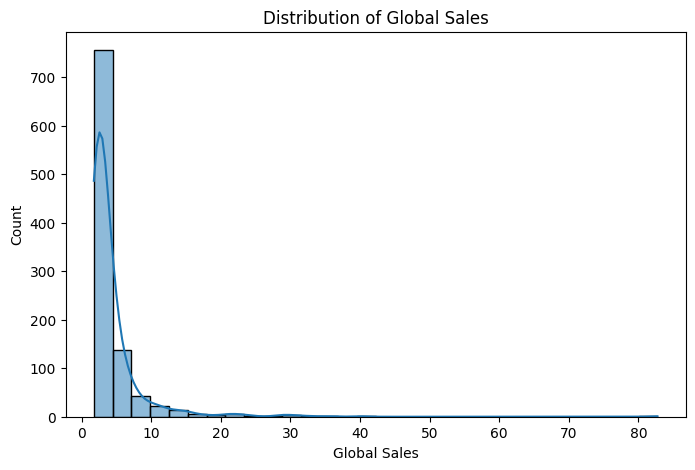

In [282]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(data['global_sales'], bins=30, kde=True)
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales')
plt.ylabel('Count')
plt.show()


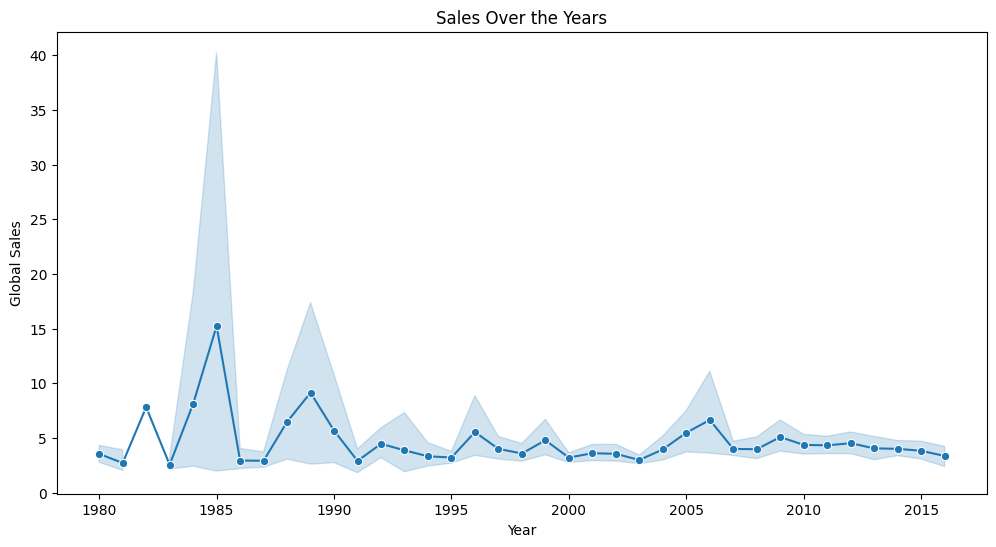

In [283]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='global_sales', data=data, marker='o')
plt.title('Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.show()


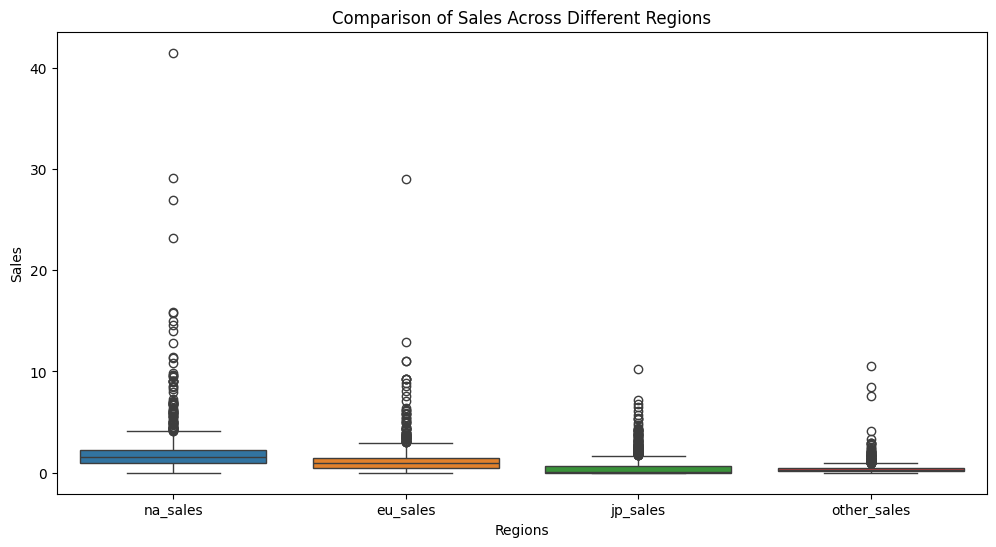

In [284]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']])
plt.title('Comparison of Sales Across Different Regions')
plt.xlabel('Regions')
plt.ylabel('Sales')
plt.show()


Text(0, 0.5, 'Global Sales')

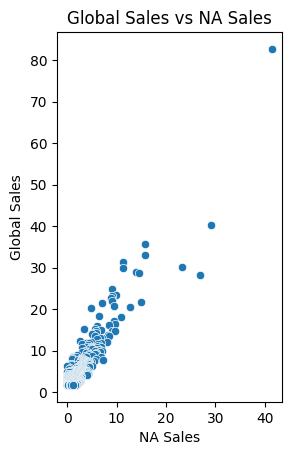

In [290]:
# Scatter plot for Global Sales vs NA Sales
plt.subplot(1, 2, 1)
sns.scatterplot(x=data['na_sales'], y=data['global_sales'])
plt.title('Global Sales vs NA Sales')
plt.xlabel('NA Sales')
plt.ylabel('Global Sales')

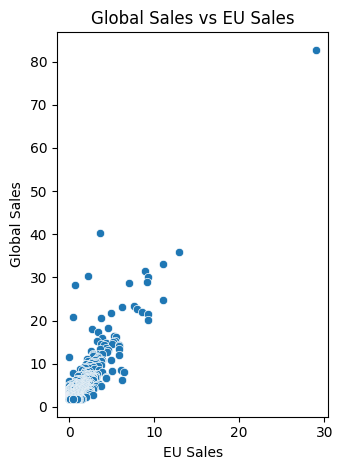

In [291]:
plt.subplot(1, 2, 2)
sns.scatterplot(x=data['eu_sales'], y=data['global_sales'])
plt.title('Global Sales vs EU Sales')
plt.xlabel('EU Sales')
plt.ylabel('Global Sales')

plt.tight_layout()
plt.show()

In [ ]:
MODEL BUILDING AND SELECTION


In [270]:
X = data.drop('global_sales', axis=1)
y = data['global_sales']

In [271]:
!pip install scikit-learn


In [272]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


In [273]:
X_train.shape, X_test.shape


((750, 17), (250, 17))

In [137]:
MODEL TRAINING

SyntaxError: invalid syntax (317892889.py, line 1)

In [274]:
def model_acc(model):
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(str(model)+ ' --> ' +str(acc))

In [275]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model_acc(lr)

from sklearn.linear_model import Lasso
lasso = Lasso()
model_acc(lasso)

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
model_acc(dt)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model_acc(rf)
from sklearn.linear_model import Ridge
ridge = Ridge()
model_acc(ridge)


LinearRegression() --> 0.9999980758209258
Lasso() --> 0.8831504677045343
DecisionTreeRegressor() --> 0.9151609465120698
RandomForestRegressor() --> 0.9414303219049092
Ridge() --> 0.9999973112973862


In [ ]:
Hyper parameter tuning

In [276]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Linear Regression
parameters = {'fit_intercept': [True, False]}

# Create Linear Regression model
lr = LinearRegression()

# Perform Grid Search
grid_obj = GridSearchCV(estimator=lr, param_grid=parameters, cv=5)
grid_fit = grid_obj.fit(X_train, y_train)

# Get the best model
best_model = grid_fit.best_estimator_

# Evaluate on the test set
score = best_model.score(X_test, y_test)
print(f"Best Linear Regression Model: {best_model}")
print(f"Test Score: {score}")


Best Linear Regression Model: LinearRegression(fit_intercept=False)
Test Score: 0.9999980758209248


In [277]:
X_test.columns


Index(['year', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales',
       'platform_processed_Other', 'platform_processed_PS2',
       'platform_processed_PS3', 'platform_processed_X360',
       'genre_processed_Action', 'genre_processed_Other',
       'genre_processed_Shooter', 'genre_processed_Sports',
       'publisher_processed_Electronic Arts', 'publisher_processed_Nintendo',
       'publisher_processed_Other',
       'publisher_processed_Sony Computer Entertainment'],
      dtype='object')

In [ ]:
Save model

In [278]:
import pickle
with open('predictor.pickle', 'wb') as file:
    pickle.dump(best_model, file)

In [279]:
features = np.array([[8, 2013, 1000, 20000, 3000, 4000, 0, 1, 0, 0] + [0] * 7])

pred_value = best_model.predict(features)

print(pred_value)

[26074.97602077]


C:\Users\hemal\Desktop\VideoGames\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
